# About Dataset

Dataset: [SMS Spam Collection Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

# Pace: Plan

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('key')
os.environ["KAGGLE_USERNAME"] = userdata.get('username')

!kaggle datasets download -d uciml/sms-spam-collection-dataset

!unzip "sms-spam-collection-dataset.zip"

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 80.9MB/s]
Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


## Check encoding type

To be able to open file we are checking the file encoding type


In [3]:
import chardet

with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7269493857068697, 'language': ''}


# pAce: Analyze
## Data Exploration

In [4]:
df = pd.read_csv('spam.csv', encoding="Windows-1252")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


There are duplicated row in data

## Data Cleaning
Remove unnecessary columns.

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.isna().sum()

,0
v1,0
v2,0


In [8]:
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

In [9]:
df.duplicated().sum()

403

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.label = df.label.map({'ham': 0, 'spam': 1})

### Target Data Balance

<Axes: xlabel='label'>

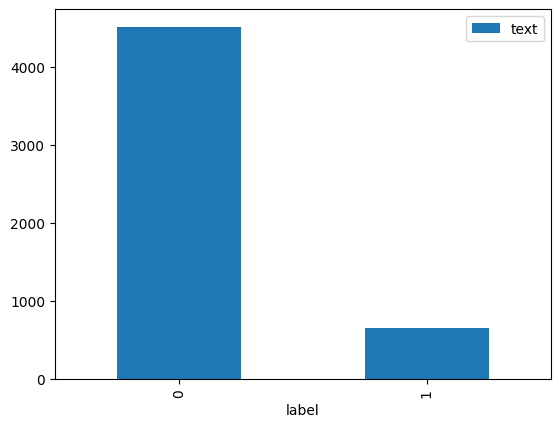

In [12]:
df.groupby("label").count().plot.bar()

In [13]:
df["length"] = df.text.apply(len)
df.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### Import packages for text adjustment

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**WordNetLemmatizer:** Reduces words to their base or dictionary form (lemma), preserving meaning (e.g., "running" → "run").

**PorterStemmer**: Stems words by removing suffixes, often resulting in non-dictionary forms (e.g., "running" → "run").

**CountVectorizer:** Converts text into a matrix of word counts, representing text as numerical data.

**TfidfVectorizer:** Converts text into a matrix of TF-IDF scores, emphasizing important words while downweighting common ones.

### Required Functions for Cleaning

In [15]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r"[^a-zA-Z]", " ", text).split()
  text = " ".join(text)

  return text

def remove_stopwords(text):
  text = text.split()
  text = [word for word in text if word not in stop_words]
  text = " ".join(text)

  return text

def lemmatization(text):
  text = text.split()
  text = [lemmatizer.lemmatize(word) for word in text]
  text = " ".join(text)

  return text

def stemming(text):
  text = text.split()
  text = [stemmer.stem(word) for word in text]
  text = " ".join(text)

  return text


stemming("cats walked")


'cat walk'

In [16]:
df["clean_text"] = df.text.apply(clean_text)
df.head()

,label,text,length,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...


In [17]:
df["without_stopwords"] = df.clean_text.apply(remove_stopwords)
df.head()

,label,text,length,clean_text,without_stopwords
0,0,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,nah think goes usf lives around though


In [18]:
df["lemmatization"] = df.without_stopwords.apply(lemmatization)
df.head()

,label,text,length,clean_text,without_stopwords,lemmatization
0,0,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,u dun say early hor u c already say,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,nah think goes usf lives around though,nah think go usf life around though


In [19]:
df["stemming_lemmatization"] = df.lemmatization.apply(stemming)
df.head()

,label,text,length,clean_text,without_stopwords,lemmatization,stemming_lemmatization
0,0,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,u dun say early hor u c already say,u dun say early hor u c already say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,nah think goes usf lives around though,nah think go usf life around though,nah think go usf life around though


### Example of What We Succeed

In [20]:
columns = df.select_dtypes(include='object').columns
sample = df.sample(1)
for column in columns:
  print(f"Sample of column {column}: ")
  print(sample[column].iloc[0], end="\n\n")

Sample of column text: 
I want to show you the world, princess :) how about europe?

Sample of column clean_text: 
i want to show you the world princess how about europe

Sample of column without_stopwords: 
want show world princess europe

Sample of column lemmatization: 
want show world princess europe

Sample of column stemming_lemmatization: 
want show world princess europ



In [21]:
corpus = [text for text in df.stemming_lemmatization]
X = count_vectorizer.fit_transform(corpus).toarray()
y = df.label

In [22]:
count_vectorizer.get_feature_names_out()

array(['aa', 'aah', 'aaniy', ..., 'zoom', 'zouk', 'zyada'], dtype=object)

# paCe: Construct


## Required Functions for GridSearchCV Results

In [27]:
import pickle

def write_model(path, model_object, model_name:str):
    with open(path + model_name + ".pickle", "wb") as file:
        pickle.dump(model_object, file)

def load_model(path, model_name):
    with open(path + model_name + ".pickle", "rb") as file:
        model = pickle.load(file)
    return model

def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

## Import Packages for Models

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

## Hyperparameter & Metrics Tuning for Models

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [LogisticRegression(random_state=0), SVC(random_state=0), MultinomialNB(), BernoulliNB() , XGBClassifier(random_state=0)]

scores = ["recall", "precision", "f1", "accuracy", "roc_auc"]

params = {
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'MultinomialNB': {
        'alpha': [0.1, 1, 10],
        'fit_prior': [True, False]
    },
    'BernoulliNB': {
        'alpha': [0.1, 1, 10],
        'fit_prior': [True, False]
    },
    'XGBClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

In [ ]:
%%time
best_models = {
    "LogisticRegression": "",
    "SVC": "",
    "MultinomialNB": "",
    "BernoulliNB": "",
    "XGBClassifier": ""
}

results = pd.DataFrame()

for m in models:
  cv = GridSearchCV(m, param_grid=params[m.__class__.__name__], cv=5, scoring= scores, refit = "roc_auc", verbose= 50)
  cv.fit(X_train, y_train)
  best_models[m.__class__.__name__] = cv
  print(f"{m.__class__.__name__} done")

  results = pd.concat([results, make_results(m.__class__.__name__, cv, "auc")], axis=0)


## Results of Models

### GridSearchCV Results

In [31]:
results.head()

,model,precision,recall,F1,accuracy,auc
0,LogisticRegression,0.982279,0.842477,0.906606,0.978718,0.985841
0,SVC,0.988912,0.848457,0.913125,0.980169,0.987959
0,MultinomialNB,0.820783,0.933042,0.872759,0.966385,0.982382
0,BernoulliNB,0.891281,0.935003,0.912538,0.977993,0.990380
0,XGBClassifier,0.955907,0.834653,0.890771,0.974849,0.979374


In [32]:
for name, model in best_models.items():
  write_model("/content/", best_models.get(name).best_estimator_, name)

### Prediction Results

In [33]:
scores_result = pd.DataFrame()
for name, model in best_models.items():
  scores_result = pd.concat([scores_result, get_scores(name, model, X_test, y_test)], axis=0)

In [34]:
scores_result

,model,precision,recall,f1,accuracy,AUC
0,LogisticRegression,0.984615,0.882759,0.930909,0.981625,0.940254
0,SVC,0.992126,0.868966,0.926471,0.980658,0.933920
0,MultinomialNB,0.844720,0.937931,0.888889,0.967118,0.954905
0,BernoulliNB,0.893082,0.979310,0.934211,0.980658,0.980094
0,XGBClassifier,0.969231,0.868966,0.916364,0.977756,0.932233


In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

<Figure size 600x600 with 0 Axes>

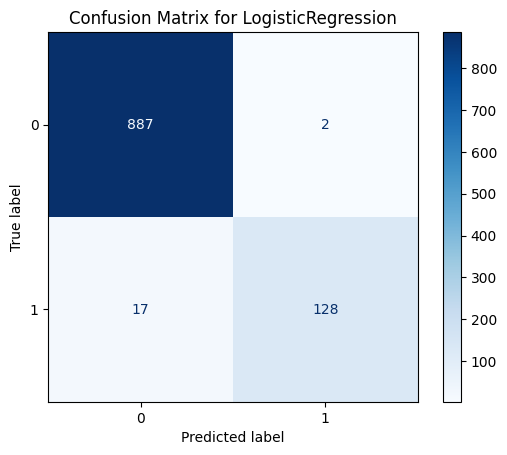

<Figure size 600x600 with 0 Axes>

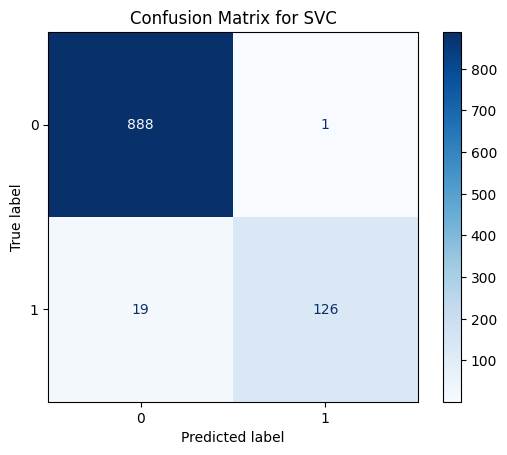

<Figure size 600x600 with 0 Axes>

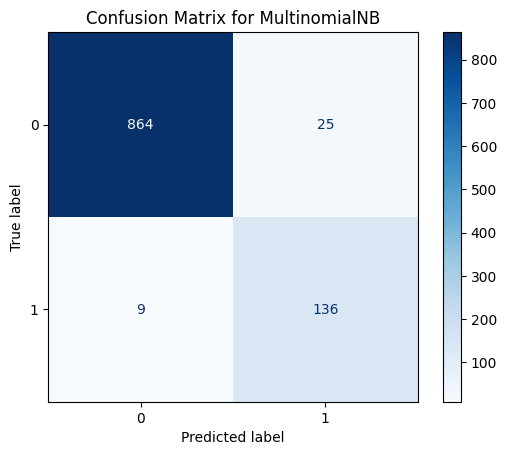

<Figure size 600x600 with 0 Axes>

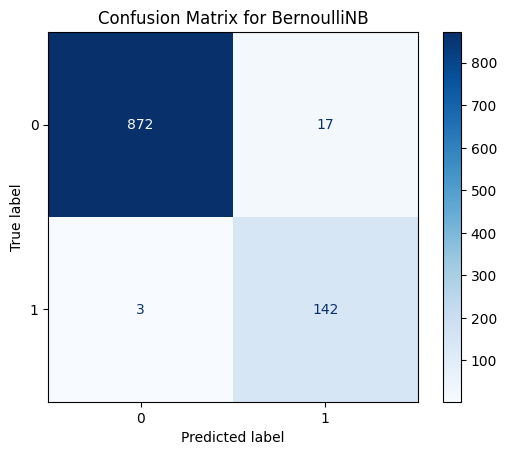

<Figure size 600x600 with 0 Axes>

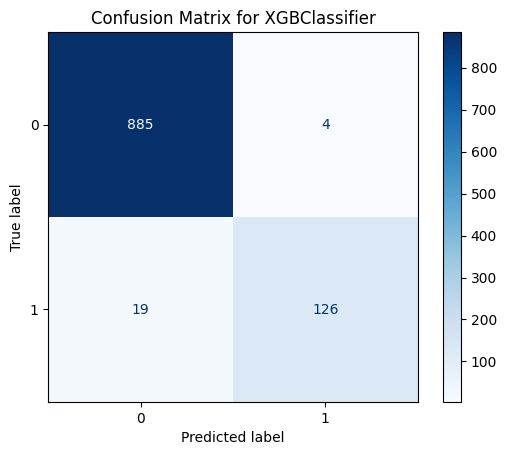

In [36]:
for name, model in best_models.items():
  plt.figure(figsize=(6, 6))
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot(cmap=plt.cm.Blues)
  plt.title(f"Confusion Matrix for {name}")
  plt.show()


# pacE: Execute

### **Why Choose BernoulliNB?**

*Highest Recall (0.935):* Best at minimizing false negatives, making it ideal when missing positive cases is costly.

*Highest AUC (0.990):* Excellent at distinguishing between classes, especially useful for imbalanced datasets.

*Good F1-Score (0.913):* Balances precision and recall effectively.

*Lightweight and Fast:* Efficient for large datasets due to its simplicity.

### **Why Choose SVC?**

*Highest Precision (0.989):* Best at minimizing false positives, ideal when false alarms are critical.

*Highest Accuracy (0.980):* Overall, it makes the most correct predictions.

*Strong F1-Score (0.913):* Balances precision and recall well.

*Robust Performance:* Handles complex decision boundaries effectively.

## **Summary:**

Choose BernoulliNB if recall and AUC are priorities (e.g., medical diagnosis, fraud detection).

Choose SVC if precision and accuracy are critical (e.g., spam detection, quality control).